Air Quality Index Analysis

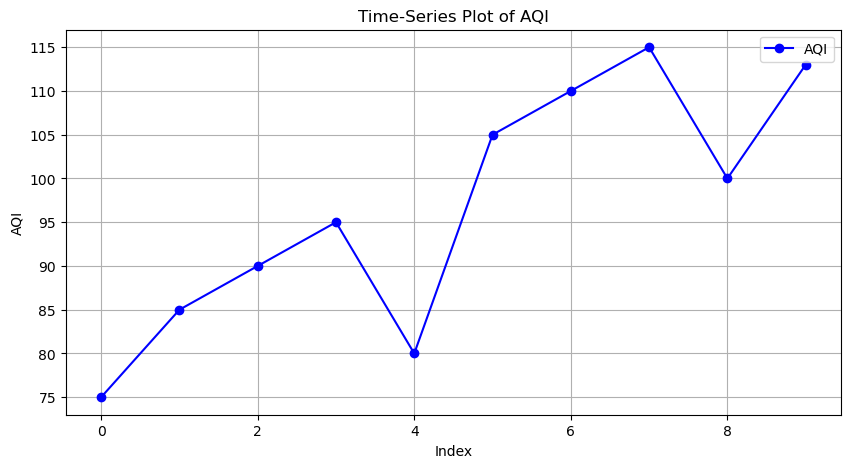

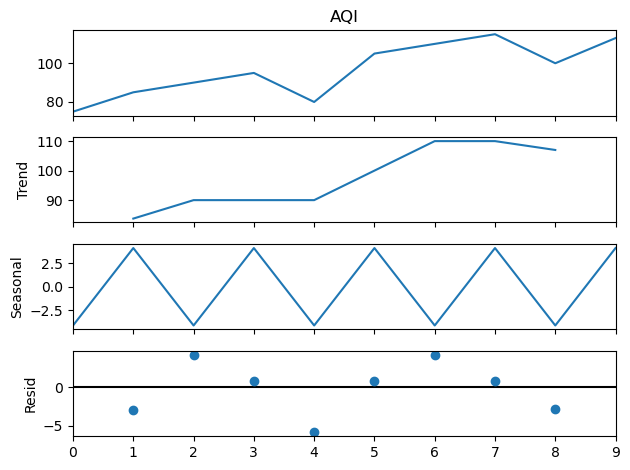

Mean Squared Error (MSE): 10.082500000000003
R-squared Score (R2): 0.8207555555555555


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.seasonal import seasonal_decompose

# Define the data manually
data_dict = {
    'Datetime': [
        "2023-01-01 00:00:00", "2023-01-01 01:00:00", "2023-01-01 02:00:00",
        "2023-01-01 03:00:00", "2023-01-01 04:00:00", "2023-01-01 05:00:00",
        "2023-01-01 06:00:00", "2023-01-01 07:00:00", "2023-01-01 08:00:00",
        "2023-01-01 09:00:00"
    ],
    'PM2.5': [50, 60, 65, 70, 55, 80, 85, 90, 75, 88],
    'PM10': [100, 110, 115, 120, 105, 130, 135, 140, 125, 138],
    'Temperature': [20, 22, 19, 18, 25, 27, 30, 29, 24, 26],
    'Wind Speed': [5, 4, 6, 5, 3, 2, 4, 5, 3, 4],
}

# Create a DataFrame
data = pd.DataFrame(data_dict)

# Convert the manually defined Datetime column to datetime type
data['Datetime'] = pd.to_datetime(data['Datetime'])

# Extract features from Datetime
data['Hour'] = data['Datetime'].dt.hour
data['Day'] = data['Datetime'].dt.day
data['Month'] = data['Datetime'].dt.month

# Compute AQI (simplified calculation)
data['AQI'] = 0.5 * data['PM2.5'] + 0.5 * data['PM10']

# Drop the original Datetime column (optional)
data.drop('Datetime', axis=1, inplace=True)

# Plot AQI time series
plt.figure(figsize=(10, 5))
plt.plot(data['AQI'], label='AQI', color='blue', marker='o')
plt.title('Time-Series Plot of AQI')
plt.xlabel('Index')
plt.ylabel('AQI')
plt.grid()
plt.legend()
plt.show()

# Seasonal decomposition (included for structure, even with small data)
try:
    result = seasonal_decompose(data['AQI'], model='additive', period=2)
    result.plot()
    plt.show()
except ValueError as e:
    print("Seasonal decomposition error:", e)

# Prepare data for machine learning
X = data[['PM2.5', 'PM10', 'Temperature', 'Wind Speed', 'Hour', 'Day', 'Month']].values
y = data['AQI'].values

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)  # Increased estimators for better accuracy
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R-squared Score (R2):", r2_score(y_test, y_pred))
